bi hasta geldi ve ilgili bilgilerini girdiğimzideşehekr hastası olup olmadııgnı teşhis edicez: şeker hastalıgı tahmin modeli yanii

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Veri seti hikayesi ve problem: Şeker hastalığı tespiti

In [2]:
df = pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Lojistik regresyon(Logistic regression)

Model & tahmin

In [3]:
df["Outcome"].value_counts() # bağımsız değişken

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y= df["Outcome"]
x= df.drop(["Outcome"], axis=1)

In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
loj_model= LogisticRegression(solver="liblinear").fit(x,y)

In [12]:
loj_model.intercept_

array([-5.88019737])

In [13]:
loj_model.coef_

array([[ 1.17045482e-01,  2.83555213e-02, -1.69080861e-02,
         7.54243357e-04, -6.40171027e-04,  5.96312367e-02,
         6.76777175e-01,  7.20012161e-03]])

In [14]:
loj_model.predict(x)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [17]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [18]:
y_pred= loj_model.predict(x)

In [19]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]], dtype=int64)

In [20]:
accuracy_score(y, y_pred)

0.7760416666666666

In [23]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [25]:
loj_model.predict_proba(x)[0:10] # olasılık uzeridne ıstıyorsak bunu kullancaz

array([[0.35076827, 0.64923173],
       [0.9168311 , 0.0831689 ],
       [0.22483391, 0.77516609],
       [0.92117433, 0.07882567],
       [0.16753319, 0.83246681],
       [0.79872303, 0.20127697],
       [0.87988289, 0.12011711],
       [0.27775666, 0.72224334],
       [0.32082494, 0.67917506],
       [0.9224958 , 0.0775042 ]])

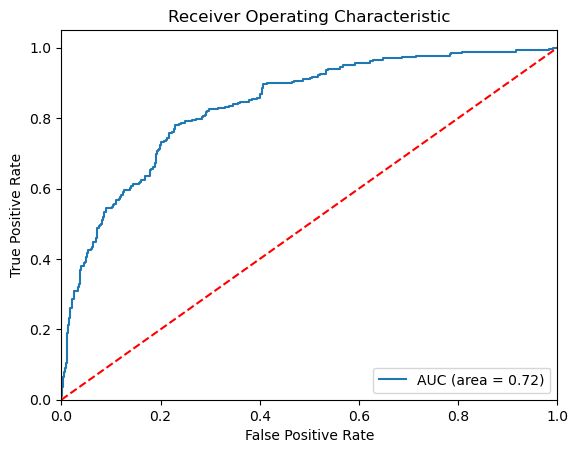

In [28]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(x))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


model tuning

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [30]:
loj_model = LogisticRegression(solver= "liblinear").fit(x_train, y_train)
y_pred= loj_model.predict(x_test)

In [31]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [33]:
cross_val_score(loj_model, x_test, y_test, cv= 10).mean()

0.7704710144927536

skor ne kadar büyükse o kadar iyi